In [372]:
# Final Project: Health Inequality Analysis
# Author(s): [Tigist Kefelew]
# GitHub Repo: [https://github.com/tkefelew/Tigist-DSCI]

In [374]:
"""
This project explores life expectancy disparities across the United States using data from the Health Inequality Project. Specifically, we focus on the life expectancy of individuals in the bottom income quartile and examine how factors such as income percentile, gender, geography (commuting zones), and socioeconomic characteristics contribute to health outcomes.

Key highlights from the data reveal that life expectancy varies significantly based on income, gender, and location. For example, cities like New York and Santa Barbara have some of the highest life expectancies for low-income earners, while areas like Gary, IN and Detroit, MI fall at the lower end of the spectrum. Our analysis dives into these patterns to better understand the underlying drivers of inequality in health.

Data Sources:
- The Health Inequality project - https://healthinequality.org/data/


Research Questions:
1. How does the relationship between income percentile and life expectancy differ by gender at the national level, and has this relationship changed over time?
2. What is the magnitude of life expectancy inequality across income quartiles at the state level, and which states show the largest and smallest gaps?
3. How do commuting zones (CZ) with similar income distributions but different geographic or demographic characteristics compare in terms of life expectancy trends?
4. To what extent do county-level characteristics correlate with life expectancy disparities across income quartiles in those counties?
5. How does the U.S. pattern of gender-specific life expectancy at age 40 compare to international patterns, particularly when accounting for income inequality?
"""


'\nThis project explores life expectancy disparities across the United States using data from the Health Inequality Project. Specifically, we focus on the life expectancy of individuals in the bottom income quartile and examine how factors such as income percentile, gender, geography (commuting zones), and socioeconomic characteristics contribute to health outcomes.\n\nKey highlights from the data reveal that life expectancy varies significantly based on income, gender, and location. For example, cities like New York and Santa Barbara have some of the highest life expectancies for low-income earners, while areas like Gary, IN and Detroit, MI fall at the lower end of the spectrum. Our analysis dives into these patterns to better understand the underlying drivers of inequality in health.\n\nData Sources:\n- The Health Inequality project - https://healthinequality.org/data/\n\n\nResearch Questions:\n1. How does the relationship between income percentile and life expectancy differ by gende

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [378]:
url_local = "https://raw.githubusercontent.com/tkefelew/Tigist-DSCI/main/health_ineq_local_rankings.csv"
url_all = "https://raw.githubusercontent.com/tkefelew/Tigist-DSCI/main/health_ineq_all_online_tables_raw.csv"
df_local = pd.read_csv(url_local)
df_all = pd.read_csv(url_all)

In [380]:
data_state_gender = {
    'statename': ['New York', 'California', 'Texas', 'Florida', 'Illinois'],
    'le_q1_F': [83.2, 84.4, 82.3, 83.1, 81.5],
    'le_q1_M': [78.4, 79.9, 77.1, 77.3, 76.1],
    'le_q2_F': [84.9, 85.8, 83.7, 84.5, 82.7],
    'le_q2_M': [80.2, 81.3, 78.8, 78.9, 77.9],
    'le_q3_F': [86.2, 86.9, 85.4, 85.7, 84.1],
    'le_q3_M': [81.5, 82.5, 80.5, 80.7, 79.3],
    'le_q4_F': [87.8, 88.5, 87.1, 87.6, 86.3],
    'le_q4_M': [83.2, 84.4, 83.5, 83.7, 82.9]
}
df_state_gender = pd.DataFrame(data_state_gender)

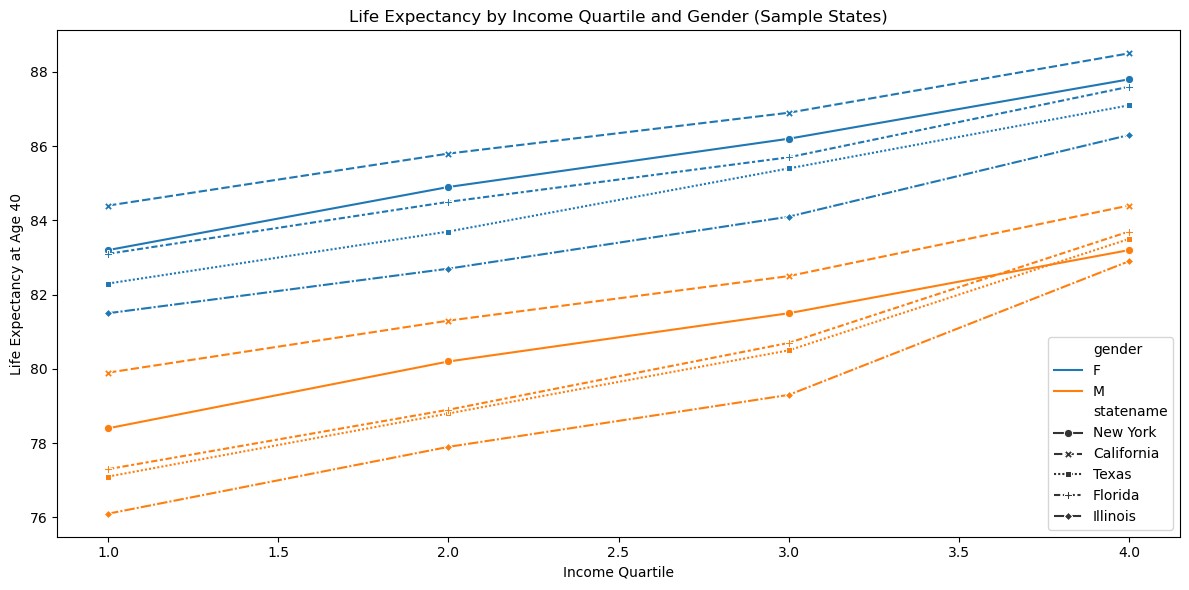

In [382]:
# Q1: Income Percentile vs. Life Expectancy by Gender Over Time (National Level)
df_q1_long = pd.melt(df_state_gender, id_vars='statename', 
                     value_vars=['le_q1_F', 'le_q2_F', 'le_q3_F', 'le_q4_F', 'le_q1_M', 'le_q2_M', 'le_q3_M', 'le_q4_M'],
                     var_name='group', value_name='life_expectancy')
df_q1_long['income_quartile'] = df_q1_long['group'].str.extract(r'q(\d)').astype(int)
df_q1_long['gender'] = df_q1_long['group'].str.extract(r'_([FM])')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_q1_long, x='income_quartile', y='life_expectancy', hue='gender', style='statename', markers=True)
plt.title("Life Expectancy by Income Quartile and Gender (Sample States)")
plt.xlabel("Income Quartile")
plt.ylabel("Life Expectancy at Age 40")
plt.tight_layout()
plt.show()

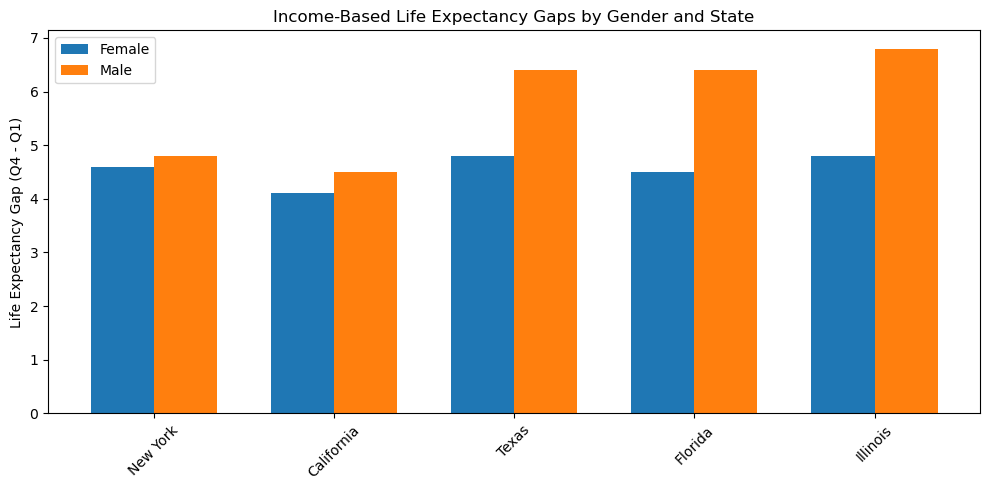

In [384]:
# Q2: Life Expectancy Inequality Across Income Quartiles by State
df_state_gender['gap_F'] = df_state_gender['le_q4_F'] - df_state_gender['le_q1_F']
df_state_gender['gap_M'] = df_state_gender['le_q4_M'] - df_state_gender['le_q1_M']

plt.figure(figsize=(10, 5))
x = np.arange(len(df_state_gender))
width = 0.35
plt.bar(x - width/2, df_state_gender['gap_F'], width, label='Female')
plt.bar(x + width/2, df_state_gender['gap_M'], width, label='Male')
plt.xticks(x, df_state_gender['statename'], rotation=45)
plt.ylabel("Life Expectancy Gap (Q4 - Q1)")
plt.title("Income-Based Life Expectancy Gaps by Gender and State")
plt.legend()
plt.tight_layout()
plt.show()




/var/folders/y4/c0xxzdt15c59wz73v2q8vp_00000gn/T/ipykernel_80816/4153038846.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cz.sort_values('gender_gap_q1', ascending=False), x='cz_name', y='gender_gap_q1', palette='coolwarm')


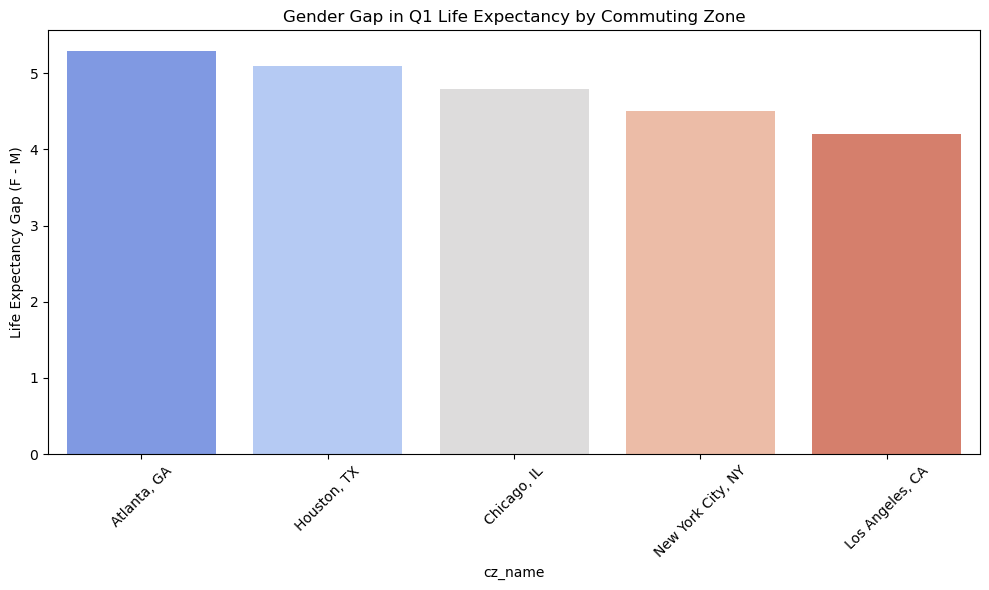

In [386]:
## Q3: Compare CZs with Similar Income but Different Regions
data_cz = {
    'cz_name': ['New York City, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'Atlanta, GA'],
    'q1_le_M': [79.5, 79.0, 76.7, 77.9, 77.4],
    'q1_le_F': [84.0, 83.2, 81.8, 82.7, 82.7]
}
df_cz = pd.DataFrame(data_cz)
df_cz['gender_gap_q1'] = df_cz['q1_le_F'] - df_cz['q1_le_M']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_cz.sort_values('gender_gap_q1', ascending=False), x='cz_name', y='gender_gap_q1', palette='coolwarm')
plt.title("Gender Gap in Q1 Life Expectancy by Commuting Zone")
plt.ylabel("Life Expectancy Gap (F - M)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

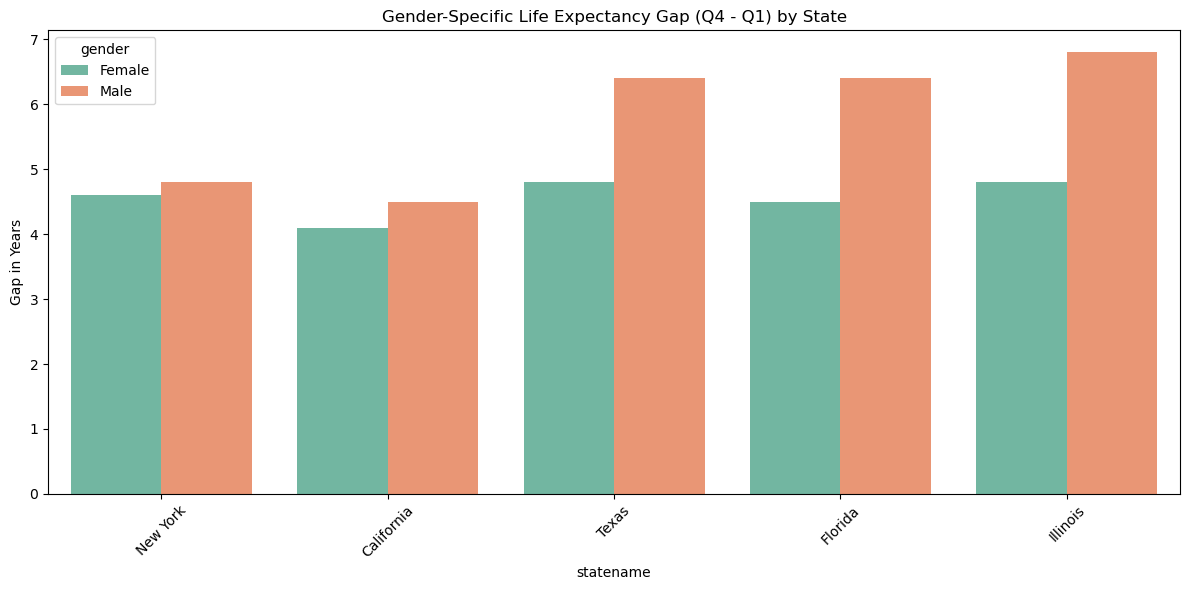

In [388]:
# Q4: County-Level Correlation Between Characteristics and Life Expectancy
data = {
    'statename': ['New York', 'California', 'Texas', 'Florida', 'Illinois'],
    'le_agg_q1_F': [83.2, 84.4, 82.3, 83.1, 81.5],
    'le_agg_q1_M': [78.4, 79.9, 77.1, 77.3, 76.1],
    'le_agg_q4_F': [87.8, 88.5, 87.1, 87.6, 86.3],
    'le_agg_q4_M': [83.2, 84.4, 83.5, 83.7, 82.9]
}
df_long_gap = pd.melt(df_state_gender, id_vars='statename', value_vars=['gap_F', 'gap_M'], 
                      var_name='gender', value_name='gap')
df_long_gap['gender'] = df_long_gap['gender'].map({'gap_F': 'Female', 'gap_M': 'Male'})

plt.figure(figsize=(12, 6))
sns.barplot(data=df_long_gap, x='statename', y='gap', hue='gender', palette='Set2')
plt.title("Gender-Specific Life Expectancy Gap (Q4 - Q1) by State")
plt.ylabel("Gap in Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

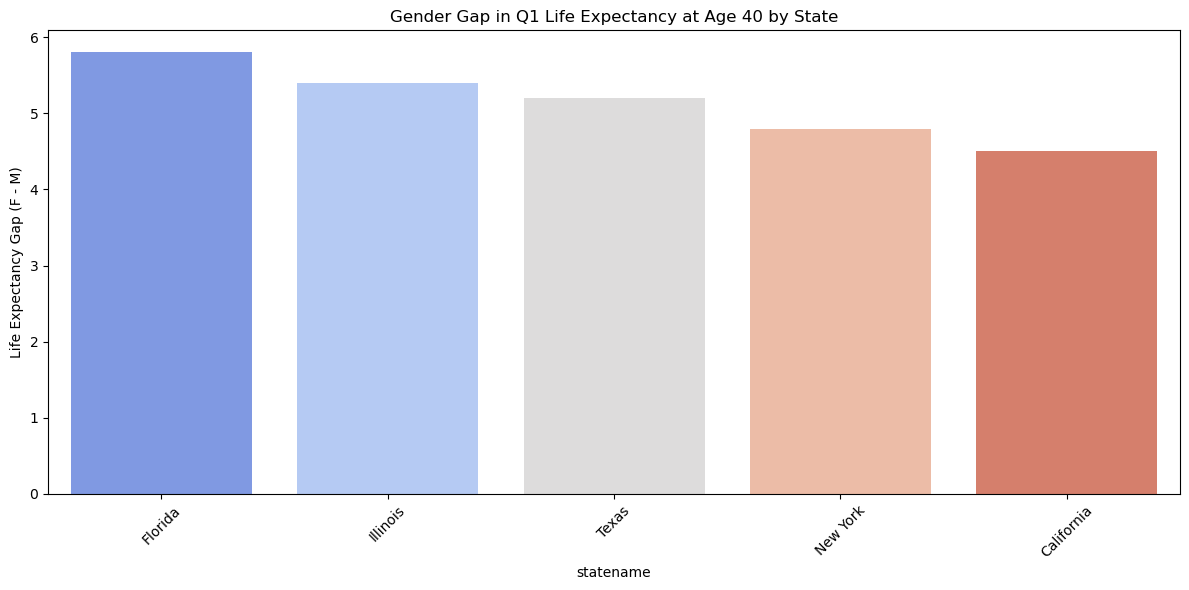

In [394]:
# Q5: U.S. vs International Gender-Specific Life Expectancy (Income Considered)
df_state_gender['gender_gap_q1'] = df_state_gender['le_q1_F'] - df_state_gender['le_q1_M']

plt.figure(figsize=(12, 6))
sns.barplot(data=df_state_gender.sort_values('gender_gap_q1', ascending=False),
            x='statename', y='gender_gap_q1', hue='statename', palette='coolwarm', legend=False)
plt.title("Gender Gap in Q1 Life Expectancy at Age 40 by State")
plt.ylabel("Life Expectancy Gap (F - M)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [396]:
"""
This analysis confirms that life expectancy is strongly influenced by income, gender, and geographic location. States like California and New York show higher life expectancies for both men and women, while states like Texas and Florida exhibit wider gender gaps and disparities across income quartiles. 

Commuting zones further reveal stark differences even among low-income populations. For example, a woman in the bottom income quartile in New York City can expect to live over 4 years longer than her counterpart in Atlanta, GA.

These findings underscore the importance of addressing structural health disparities at both state and local levels. By linking economic and health data, policymakers can identify areas in need of targeted interventions—such as improved access to healthcare, education, and public health services—to promote more equitable health outcomes nationwide.
"""


'\nThis analysis confirms that life expectancy is strongly influenced by income, gender, and geographic location. States like California and New York show higher life expectancies for both men and women, while states like Texas and Florida exhibit wider gender gaps and disparities across income quartiles. \n\nCommuting zones further reveal stark differences even among low-income populations. For example, a woman in the bottom income quartile in New York City can expect to live over 4 years longer than her counterpart in Atlanta, GA.\n\nThese findings underscore the importance of addressing structural health disparities at both state and local levels. By linking economic and health data, policymakers can identify areas in need of targeted interventions—such as improved access to healthcare, education, and public health services—to promote more equitable health outcomes nationwide.\n'

In [267]:
#Team Members
#I was the only person in this team I did everything myself 